# This notebook was not used in our analysis.  It was saved as a reference. 

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import json
import requests
import time
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

In [3]:
data = pd.read_csv("data/df_joined.csv")
df = pd.DataFrame(data)

In [4]:
y = df.price
X = df.drop(columns = "price", axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [19]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train ,X_int).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     706.4
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:12:44   Log-Likelihood:            -2.2552e+05
No. Observations:               16914   AIC:                         4.513e+05
Df Residuals:                   16797   BIC:                         4.522e+05
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.156e+08   9.97e+06    -11.602      0.000   -1.35e+08   -9.61e+07
id             -1.644e-07   4.18e-07     -0.393      0.694   -9.84e-07    6.55e-07
date             115.3414     10.267     11.234      0.000      95.217     135.466
bathrooms       2.717e+04   2817.716      9.643      0.000    2.16e+04    3.27e+04
sqft_living       97.6335      1.988     49.116      0.000      93.737     101.530
sqft_lot           0.2544      0.042      6.126      0.000       0.173       0.336
sqft_above        65.2236      2.089     31.225      0.000      61.129      69.318
sqft_basement     32.4345      2.308     14.055      0.000      27.911      36.958
yr_built        -456.2080     74.020     -6.163      0.000    -601.295    -311.121
lat             1.397e+05   6.66e+04      2.097      0.036    9094.174     2.7e+05
long           -2.043e+05   4.85e+04     -4.214      0.000   -2.99e+05   -1.09e+05
sqft_living15     29.9931      3.049      9.837      0.000      24.017      35.970
sqft_lot15        -0.1615      0.064     -2.511      0.012      -0.288      -0.035
reno_2000_over   9.51e+04   9366.594     10.153      0.000    7.67e+04    1.13e+05
reno_1980_2000  4.122e+04   1.11e+04      3.701      0.000    1.94e+04    6.31e+04
reno_1960_1980 -3.698e+04   2.16e+04     -1.714      0.087   -7.93e+04    5309.895
reno_1940_1960 -4.721e+04   3.47e+04     -1.360      0.174   -1.15e+05    2.08e+04
reno_1920_1940  6.302e+04    1.5e+05      0.419      0.675   -2.32e+05    3.58e+05
reno_never     -2518.3728   3036.046     -0.829      0.407   -8469.342    3432.597
wat_1.0         7.671e+05   1.51e+04     50.730      0.000    7.37e+05    7.97e+05
wat_nan         3216.7707   3683.471      0.873      0.383   -4003.219    1.04e+04
con_2           9.306e+04   3.42e+04      2.720      0.007     2.6e+04     1.6e+05
con_3           1.015e+05   3.17e+04      3.200      0.001    3.93e+04    1.64e+05
con_4           1.264e+05   3.17e+04      3.987      0.000    6.43e+04    1.89e+05
con_5           1.725e+05   3.19e+04      5.405      0.000     1.1e+05    2.35e+05
gra_4          -9.051e+04   1.55e+05     -0.586      0.558   -3.93e+05    2.12e+05
gra_5          -1.187e+05   1.51e+05     -0.785      0.432   -4.15e+05    1.78e+05
gra_6          -1.282e+05   1.51e+05     -0.849      0.396   -4.24e+05    1.68e+05
gra_7          -1.247e+05   1.51e+05     -0.826      0.409   -4.21e+05    1.71e+05
gra_8          -9.525e+04   1.51e+05     -0.631      0.528   -3.91e+05    2.01e+05
gra_9          -1.695e+04   1.51e+05     -0.112      0.911   -3.13e+05    2.79e+05
gra_10           1.18e+05   1.51e+05      0.780      0.435   -1.78e+05    4.15e+05
gra_11          3.074e+05   1.52e+05      2.028      0.043    1.03e+04    6.04e+05
gra_12          6.406e+05   1.53e+05      4.199      0.000    3.42e+05     9.4e+05
gra_13      

In [14]:
y_hat = model.predict()
train_rmse = mean_squared_error(y_train,y_hat)**.5
train_rmse

149394.81996863574

Our baseline adj. R-squared is .829 indicating that 83% of the variation in the dependent variable is explained by the independent variables in our model.  Our baseline RMSE is 149394, indicating that on average our model's predictions are $149394 off

In [16]:
X_int.head()

,const,id,date,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
11787,1.0,2781250400,735514,2.50,1770,4950,1770,0.0,2003,47.3497,...,0,0,0,0,0,0,0,0,0,0
12884,1.0,8946400210,735387,2.50,2110,4099,2110,0.0,2001,47.7508,...,0,0,0,0,0,0,0,0,0,0
16243,1.0,9106000050,735527,3.00,2170,2500,1710,460.0,1997,47.6742,...,0,0,0,0,0,0,0,0,0,0
3972,1.0,7980900011,735715,2.00,1910,13505,1910,0.0,1955,47.7114,...,0,0,0,0,0,0,0,0,0,0
13580,1.0,7504400120,735495,1.75,2570,12039,1910,660.0,1978,47.6260,...,0,0,0,0,0,0,0,0,0,0


In [20]:
p_table = summary.tables[1]
p_table

,coef,std err,t,P>|t|,[0.025,0.975]
const,-1.156e+08,9.97e+06,-11.602,0.000,-1.35e+08,-9.61e+07
id,-1.644e-07,4.18e-07,-0.393,0.694,-9.84e-07,6.55e-07
date,115.3414,10.267,11.234,0.000,95.217,135.466
bathrooms,2.717e+04,2817.716,9.643,0.000,2.16e+04,3.27e+04
sqft_living,97.6335,1.988,49.116,0.000,93.737,101.530
sqft_lot,0.2544,0.042,6.126,0.000,0.173,0.336
sqft_above,65.2236,2.089,31.225,0.000,61.129,69.318
sqft_basement,32.4345,2.308,14.055,0.000,27.911,36.958
yr_built,-456.2080,74.020,-6.163,0.000,-601.295,-311.121
lat,1.397e+05,6.66e+04,2.097,0.036,9094.174,2.7e+05


In [22]:
p_table_df = pd.DataFrame(p_table.data)
p_table_df.columns=['column','coef','std err','t','P>|t|','0.025','0.975']
p_table_df.drop(labels=0,axis=0,inplace=True)
p_table_df.set_index('column',inplace=True)
p_table_df['P>|t|'] = p_table_df['P>|t|'].astype(float)
p_table_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, const to zip_98199
Data columns (total 6 columns):
coef       120 non-null object
std err    120 non-null object
t          120 non-null object
P>|t|      120 non-null float64
0.025      120 non-null object
0.975      120 non-null object
dtypes: float64(1), object(5)
memory usage: 6.6+ KB


In [23]:
p_table_df['pass']=p_table_df['P>|t|'].map(lambda x: x<=.05)
pass_list=list(p_table_df[p_table_df['pass']==True].index)
pass_list

['const',
 'date',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'reno_2000_over',
 'reno_1980_2000',
 'wat_1.0',
 'con_2',
 'con_3',
 'con_4',
 'con_5',
 'gra_11',
 'gra_12',
 'gra_13',
 'flo_2.0',
 'flo_2.5',
 'flo_3.0',
 'bed_4',
 'bed_5',
 'bed_6',
 'bed_7',
 'bed_9',
 'bed_10',
 'zip_98004',
 'zip_98005',
 'zip_98006',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98022',
 'zip_98023',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98033',
 'zip_98034',
 'zip_98038',
 'zip_98039',
 'zip_98040',
 'zip_98045',
 'zip_98052',
 'zip_98053',
 'zip_98055',
 'zip_98056',
 'zip_98058',
 'zip_98059',
 'zip_98065',
 'zip_98072',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98112',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zip_98118',
 'zip_

In [24]:
len(pass_list)

87

Of our 120 number of independent variables, 87 have significant p-values.

Discussion of modeling assumptions:

* log transform to make data more normally distributed
* scaling to make everything the same magnitude
* p _value feature selection
* try to better meet assumptions:
* multicollinearity - heatmap, table
* normally distributed residuals - QQ plots
* Linearity - scatterplots
* homoscedascity - scatter plot of residuals

Check normality assumption with QQ plot

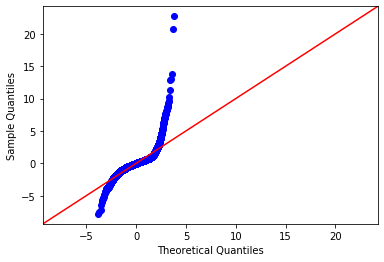

In [25]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

This QQ plot indicates that our data has very heavy tails compared to a normal distribution of residuals.

In [29]:
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
list(zip(name, test))

[('Jarque-Bera', 1537166.936065652),
 ('Prob', 0.0),
 ('Skew', 3.1317453091528535),
 ('Kurtosis', 49.280889967457384)]

The Jarque-Bera result is very high indicating that our results are not normally distributed.

Next we will check for homoscedasticity.

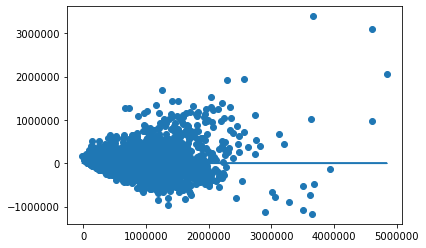

In [28]:
plt.scatter(model.predict(X_int), model.resid)
plt.plot(model.predict(X_int), [0 for i in range(len(X_int))]);

This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

In [30]:
%store pass_list

Stored 'pass_list' (list)
